In [ ]:
## Entropy ##
# Measure of a dataset's disorder (same/different)
# Classify dataset into N classes: 0 if all classes are same or 1+ if different
# If 5 images are cats it's 0, if cats, dogs and horses then Entropy is 1+

## Decision Trees (Also known as ID3) ##
# Supervised Learning
# Flowchart to aid in classification
# At each step, find attribute to use to partition data to minimise entropy at next step
# Greedy algorithm, as it descends just picks the decision that reduces entropy the most
# Not the most optimal! Prone to overfitting, counter with Random Forest

## Random Forest ##
# Make several alternate trees to 'vote' on final classification
# Randomly resample each tree's input data (bagging or bootstrap aggregating)
# Randomise a subset of the attributes each step can choose from

In [1]:
# Decision tree to filter CVs, with database of hired/refused candidate data
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

dataset = r'C:\Users\MHayden\Desktop\MLCourse\PastHires.csv'
df = pd.read_csv(dataset,header=0)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [2]:
# sklearn decision trees needs numerical data. 
# So, map Y/N to 1,0 and Education Levels to 0,1,2.
d = {'BS':0,'MS':1,'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)
d = {'Y':1,'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [3]:
# Seperate features from columns we're building tree for
features = list(df.columns[:6])
print(features)

# Build tree
y = df['Hired']
X = df[features]
classify = tree.DecisionTreeClassifier()
classify = classify.fit(X,y)

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


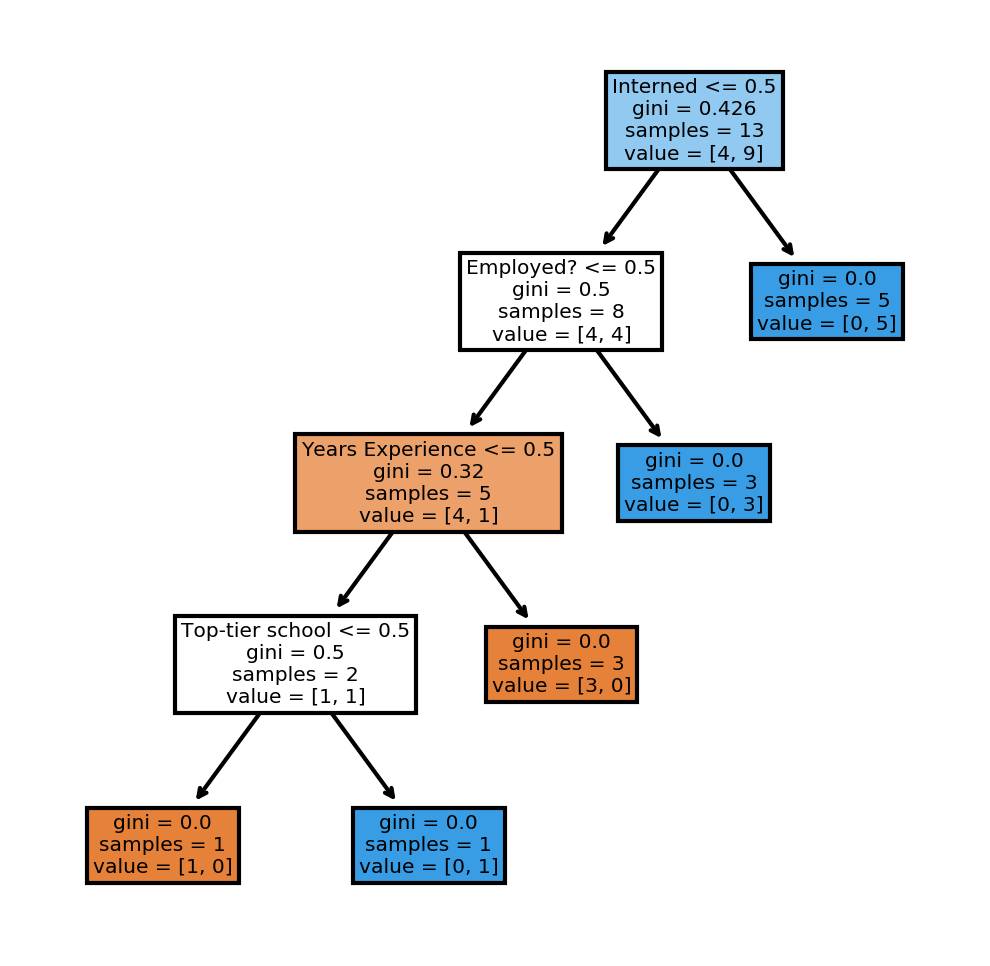

In [6]:
# Visualise: see https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classify,feature_names=features,filled=True)
fig.savefig('DecisionTree.png')

# If no, go left. If yes, go right.
# Gini = measure Entropy. Value [hired,not-hired]

In [10]:
# Random Forest if overfitting
from sklearn.ensemble import RandomForestClassifier

classify = RandomForestClassifier(n_estimators=10)# 10 trees
classify = classify.fit(X,y)

# Predict person with 10 years work experience (2 []'s for array error')
print(classify.predict([[10,1,4,0,0,0]]))
# Predict person with 0 years work experience
print(classify.predict([[10,0,4,0,0,0]]))

[1]
[0]
